In [17]:
import ultra.visuals as v
from ultra.visuals import make_matplotlib_pretty_again 
import vice 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter as fsf 
import numpy as np 
vice.yields.ccsne.settings["o"] = 0.015 
vice.yields.ccsne.settings["fe"] = 0.0012 
vice.yields.sneia.settings["o"] = 0 
vice.yields.sneia.settings["fe"] = 0.0017 

In [18]:
def plateau_plaw(t): 
    if t < 0.15: 
        # flat before 150 Myr 
        return 0.15**-1.1 
    else: 
        # otherwise t^-1.1 power law decay 
        return t**-1.1 

In [19]:
control_kwargs = {
    "name":         "control", 
} 
short_delay_kwargs = {
    "name":         "short_delay", 
    "delay":        0.04 
} 
plateau_kwargs = {
    "name":         "plateau", 
    "delay":        0.04, 
    "RIa":          plateau_plaw 
} 
vice.singlezone(**control_kwargs).run(np.linspace(0, 10, 1001)) 
vice.singlezone(**short_delay_kwargs).run(np.linspace(0, 10, 1001)) 
vice.singlezone(**plateau_kwargs).run(np.linspace(0, 10, 1001)) 

At least one of the output files already exists. If you continue with the integration, then their contents will be lost.
Output directory: control.vice
Overwrite? (y | n) y
At least one of the output files already exists. If you continue with the integration, then their contents will be lost.
Output directory: short_delay.vice
Overwrite? (y | n) y
At least one of the output files already exists. If you continue with the integration, then their contents will be lost.
Output directory: plateau.vice
Overwrite? (y | n) y


In [20]:
def draw(axes, name, color): 
    out = vice.output(name) 
    RIa = vice.mirror(out).RIa 
    delay = vice.mirror(out).delay 
    yvals = len(out.history["time"]) * [0.] 
    for i in range(len(yvals)): 
        if out.history["time"][i] < delay: 
            continue 
        elif callable(RIa):
            yvals[i] = RIa(out.history["time"][i]) 
        elif RIa == "plaw": 
            yvals[i] = out.history["time"][i]**-1.1 
        else: 
            raise SystemError("Shouldn't be raised") 
    axes[0].plot(out.history["time"], yvals, c = v.colors()[color]) 
    axes[1].plot(out.history["[Fe/H]"], out.history["[O/Fe]"], c = v.colors()[color]) 

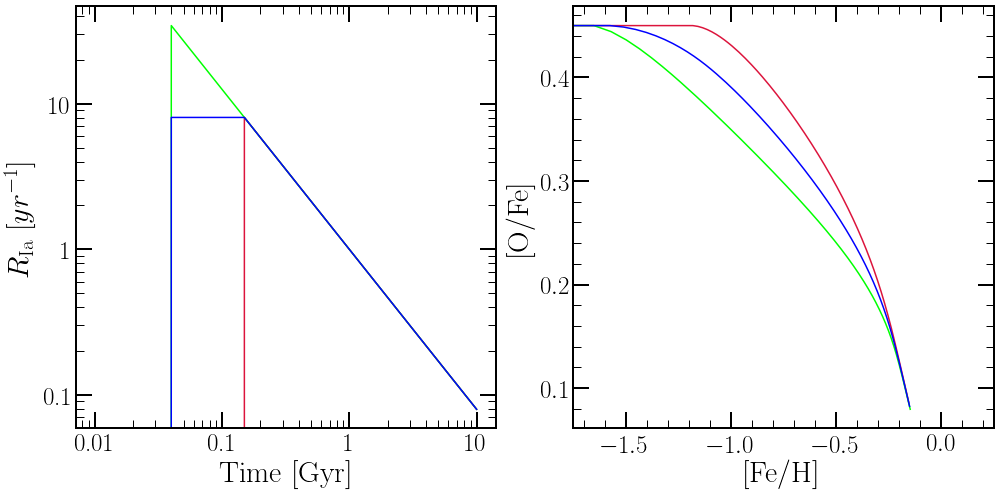

In [22]:
fig = plt.figure(figsize = (14, 7)) 
axes = 2 * [None] 
axes[0] = fig.add_subplot(121, facecolor = "white") 
axes[1] = fig.add_subplot(122, facecolor = "white") 
axes[0].set_xlabel("Time [Gyr]") 
axes[0].set_ylabel(r"$R_\text{Ia}\ [yr^{-1}]$") 
axes[1].set_xlabel("[Fe/H]") 
axes[1].set_ylabel("[O/Fe]") 
axes[0].set_xscale("log") 
axes[0].set_yscale("log") 
axes[0].xaxis.set_major_formatter(fsf("%g")) 
axes[0].yaxis.set_major_formatter(fsf("%g")) 
draw(axes, "control", "crimson") 
draw(axes, "short_delay", "lime") 
draw(axes, "plateau", "blue") 
axes[1].set_xlim([-1.75, 0.25])
plt.tight_layout() 